In [1]:
# Common imports
import numpy as np
import os
from backend import import_excel, export_excel

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# style.use('bmh')
from mpl_toolkits.mplot3d import Axes3D
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd
import seaborn as sns

import tensorflow as tf
import keras
import tensorflow as tf
from keras import Input, Model
from keras.models import Sequential, Model


import random

import sys
sys.path.append("..")

import dataset,network_ReLU

# Load Data

In [2]:
# Preprocessing

scenario= "sinus" #sinus, helix
n_instance = 5000
n_features = 2
Z=8
scales = ['-1-1','0-1']
scaled = '-1-1'
nodes=2

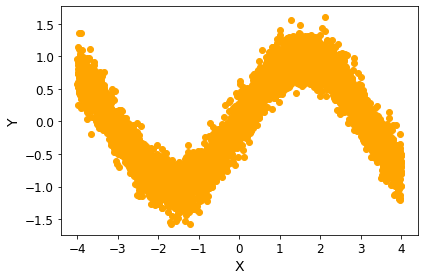

In [3]:
if scenario in ("3d", "helix"):
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
    print("X_train= x,y",X_train.shape)
    print("y_train= z",y_train.shape)

    ax = plt.subplot(projection='3d')
    ax.scatter(X_train[:,0], X_train[:,1], y_train, c='orange')
    ax.set_zlabel('Z')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')
    plt.tight_layout()

    
else:
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
    plt.scatter(X_train,y_train, c='orange', label='Sample Data')
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()

In [4]:
#storage data
os.system('mkdir Dataset')
os.system('mkdir AAE')
os.system('mkdir AAE/Models')
os.system('mkdir AAE/Losses')
os.system('mkdir AAE/Random_test')
export_excel(X_train, 'Dataset/X_train')
export_excel(y_train, 'Dataset/y_train')

# print(X_train.shape,y_train.shape)
X_train = import_excel('Dataset/X_train')
y_train = import_excel('Dataset/y_train')
print('made dataset')

made dataset


# AAE

### Architecture

In [5]:
encoder=network_ReLU.build_encoder(Z, nodes, n_features)
#print("Encoder:\n")
#encoder.summary()


decoder=network_ReLU.build_decoder(Z,nodes, n_features)
#print("Decoder:\n")
#decoder.summary()

discriminator=network_ReLU.build_discriminator(Z, nodes)
#print("Discriminator:\n")
#discriminator.summary()

Model: "Encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 256)          512         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 256)          1024        dense[0][0]                      
__________________________________________________________________________________________________
re_lu (ReLU)                    (None, 256)          0           batch_normalization[0][0]        
____________________________________________________________________________________________

### Preprocessing

In [6]:
import AAE_Model_ReLU

GANorWGAN='WGAN'
epochs = 200
BATCH_SIZE = 100
n_dis=1
#n_endis=0
n_decoder=5
#n_autoencoder=1

In [7]:
aae = AAE_Model_ReLU.AAE(Z, n_features, BATCH_SIZE,GANorWGAN,nodes,n_dis,n_decoder)

Model: "Encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 256)          512         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_14 (BatchNo (None, 256)          1024        dense_9[0][0]                    
__________________________________________________________________________________________________
re_lu_12 (ReLU)                 (None, 256)          0           batch_normalization_14[0][0]     
____________________________________________________________________________________________

In [8]:
train_dataset, scaler, X_train_scaled = aae.preproc(X_train, y_train, scaled)

print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_train_scaled",X_train_scaled.shape)


data shape_1 (100, 2)
data shape_2 (100, 2)
data shape_3 (100, 2)
data shape_4 (100, 2)
data shape_5 (100, 2)
data shape_6 (100, 2)
data shape_7 (100, 2)
data shape_8 (100, 2)
data shape_9 (100, 2)
data shape_10 (100, 2)
data shape_11 (100, 2)
data shape_12 (100, 2)
data shape_13 (100, 2)
data shape_14 (100, 2)
data shape_15 (100, 2)
data shape_16 (100, 2)
data shape_17 (100, 2)
data shape_18 (100, 2)
data shape_19 (100, 2)
data shape_20 (100, 2)
data shape_21 (100, 2)
data shape_22 (100, 2)
data shape_23 (100, 2)
data shape_24 (100, 2)
data shape_25 (100, 2)
data shape_26 (100, 2)
data shape_27 (100, 2)
data shape_28 (100, 2)
data shape_29 (100, 2)
data shape_30 (100, 2)
data shape_31 (100, 2)
data shape_32 (100, 2)
data shape_33 (100, 2)
data shape_34 (100, 2)
data shape_35 (100, 2)
data shape_36 (100, 2)
data shape_37 (100, 2)
data shape_38 (100, 2)
data shape_39 (100, 2)
data shape_40 (100, 2)
data shape_41 (100, 2)
data shape_42 (100, 2)
data shape_43 (100, 2)
data shape_44 (100, 

## Training

In [9]:
hist = aae.train(Z,BATCH_SIZE,train_dataset, epochs, scaler, scaled,X_train_scaled)
#Dropout0.8+delete Flatten, epoch=2000好  
#0126Dropout0.6+delete Flatten+增加encoder/decoder


#1203LeakyReLU+Flatten
#Change e/d architexture+1203
#試試backend/4


#self.n_critic=10
#n_c=5
#complex dis_network + more n_autoencoder

Epoch 1/200
[Dis(w): -0.005646], [endis(w)]: -0.574501, [decoder(mse)]: 0.855458]
Epoch 2/200
[Dis(w): -0.002066], [endis(w)]: -0.563375, [decoder(mse)]: 0.770912]
Epoch 3/200
[Dis(w): -0.003119], [endis(w)]: -0.559647, [decoder(mse)]: 0.670809]
Epoch 4/200
[Dis(w): 0.000543], [endis(w)]: -0.552973, [decoder(mse)]: 0.550532]
Epoch 5/200
[Dis(w): -0.000877], [endis(w)]: -0.587623, [decoder(mse)]: 0.457417]
Epoch 6/200
[Dis(w): -0.001427], [endis(w)]: -0.590191, [decoder(mse)]: 0.511693]
Epoch 7/200
[Dis(w): -0.002537], [endis(w)]: -0.590387, [decoder(mse)]: 0.554074]
Epoch 8/200
[Dis(w): -0.002510], [endis(w)]: -0.584829, [decoder(mse)]: 0.515679]
Epoch 9/200
[Dis(w): -0.002278], [endis(w)]: -0.599047, [decoder(mse)]: 0.451660]
Epoch 10/200
[Dis(w): -0.002609], [endis(w)]: -0.586703, [decoder(mse)]: 0.448116]
Epoch 11/200
[Dis(w): -0.002553], [endis(w)]: -0.611931, [decoder(mse)]: 0.450730]
Epoch 12/200
[Dis(w): -0.001870], [endis(w)]: -0.609155, [decoder(mse)]: 0.497044]
Epoch 13/200
[

[Dis(w): 0.000925], [endis(w)]: -0.864522, [decoder(mse)]: 0.425366]
Epoch 99/200
[Dis(w): 0.000938], [endis(w)]: -0.868087, [decoder(mse)]: 0.420210]
Epoch 100/200
[Dis(w): 0.000962], [endis(w)]: -0.875426, [decoder(mse)]: 0.420976]
Epoch 101/200
[Dis(w): 0.005647], [endis(w)]: -0.859364, [decoder(mse)]: 0.670848]
Epoch 102/200
[Dis(w): 0.005305], [endis(w)]: -0.871830, [decoder(mse)]: 0.614735]
Epoch 103/200
[Dis(w): 0.003003], [endis(w)]: -0.880491, [decoder(mse)]: 0.375568]
Epoch 104/200
[Dis(w): 0.001396], [endis(w)]: -0.861545, [decoder(mse)]: 0.301507]
Epoch 105/200
[Dis(w): 0.002038], [endis(w)]: -0.868702, [decoder(mse)]: 0.194503]
Epoch 106/200
[Dis(w): 0.002755], [endis(w)]: -0.873479, [decoder(mse)]: 0.103694]
Epoch 107/200
[Dis(w): 0.002542], [endis(w)]: -0.883370, [decoder(mse)]: 0.157657]
Epoch 108/200
[Dis(w): 0.002609], [endis(w)]: -0.875687, [decoder(mse)]: 0.242603]
Epoch 109/200
[Dis(w): 0.002466], [endis(w)]: -0.867997, [decoder(mse)]: 0.198851]
Epoch 110/200
[Dis(

[Dis(w): -0.000147], [endis(w)]: -0.942502, [decoder(mse)]: 0.390152]
Epoch 198/200
[Dis(w): -0.000219], [endis(w)]: -0.950911, [decoder(mse)]: 0.396948]
Epoch 199/200
[Dis(w): -0.000271], [endis(w)]: -0.950020, [decoder(mse)]: 0.404028]
Epoch 200/200
[Dis(w): -0.000293], [endis(w)]: -0.948076, [decoder(mse)]: 0.411032]


### predict from the decoder

Predicted Values: (1000, 2)


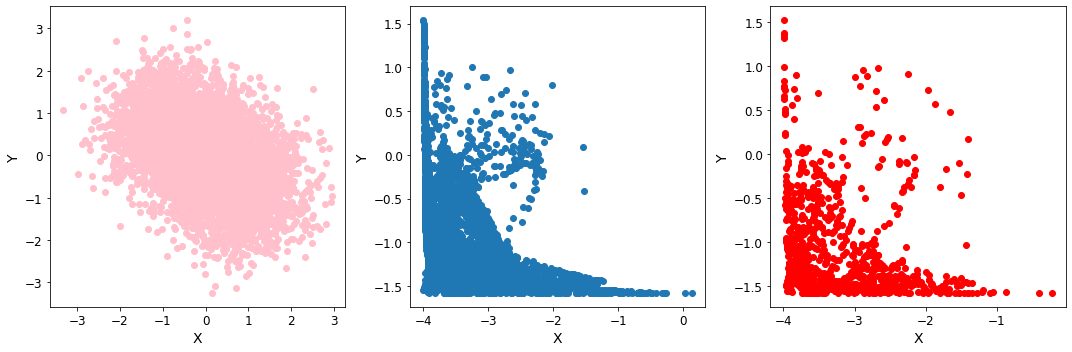

In [10]:
#predict the labels of the data values on the basis of the trained model.
#sampling from the latent space without prediction

latent_values = np.random.normal(loc=0, scale=1, size=([1000, Z]))
predicted_values = aae.decoder(latent_values)

predicted_values2 = aae.decoder(aae.encoder(X_train_scaled))
predicted_values3 = aae.encoder(X_train_scaled)
predicted_values4 = scaler.inverse_transform(X_train_scaled)

if scaled == '-1-1':
    predicted_values = scaler.inverse_transform(predicted_values)
    predicted_values2 = scaler.inverse_transform(predicted_values2)
    #predicted_values3 = scaler.inverse_transform(predicted_values3)
    
elif scaled =='0-1':
    predicted_values = scaler.inverse_transform(predicted_values)
    predicted_values2 = scaler.inverse_transform(predicted_values2)
    


if n_features==3:
    print("Predicted Values:",predicted_values.shape)
    print("latent_space:",Z)
    print("BATCH_SIZE:",BATCH_SIZE)
    print("epochs:",epochs)
    

    ab = plt.subplot(projection='3d')
    ab.scatter(predicted_values[:,0],predicted_values[:,1],predicted_values[:,2])
    ab.set_ylabel('Y')
    ab.set_zlabel('Z')
    ab.set_xlabel('X')
    
    
    print("X-Y 2D slices:")
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    plt.ylim(-1.5,1.5)
    plt.xlim(-1.5,1.5)
    axes[0].scatter(X_train[:,0],X_train[:,1])
    axes[0].scatter(predicted_values[:,0],predicted_values[:,1])
    axes[0].set_xlabel("X")
    axes[0].set_ylabel("Y")
    
    plt.ylim(-1.5,1.5)
    plt.xlim(-2,22)
    axes[1].scatter(X_train[:,1],y_train)
    axes[1].scatter(predicted_values[:,1],predicted_values[:,2])
    axes[1].set_xlabel("Y")
    axes[1].set_ylabel("Z")
    
    plt.xlim(-1.5,1.5)
    plt.ylim(-2,22)
    axes[2].scatter(X_train[:,0],y_train)
    axes[2].scatter(predicted_values[:,0],predicted_values[:,2])
    axes[2].set_xlabel("X")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    
    ac=np.where(np.logical_and(X_train[:,0]>=-0.8-0.05,X_train[:,0]<=-0.8+0.05),X_train[:,1],None)
    ad=np.where(np.logical_and(predicted_values[:,0]>=-0.8-0.05,predicted_values[:,0]<=-0.8+0.05),predicted_values[:,1],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,predicted_values[:,2])
    axes[0].set_xlabel("Y(X=-0.8)")
    axes[0].set_ylabel("Y")
    
    ae=np.where(np.logical_and(X_train[:,0]>=0.0-0.05,X_train[:,0]<=0.0+0.05),X_train[:,1],None)
    af=np.where(np.logical_and(predicted_values[:,0]>=0.0-0.05,predicted_values[:,0]<=0.0+0.05),predicted_values[:,1],None)
    axes[1].scatter(ae,y_train)
    axes[1].scatter(af,predicted_values[:,2])
    axes[1].set_xlabel("Y(X=0.0)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,0]>=0.8-0.05,X_train[:,0]<=0.8+0.05),X_train[:,1],None)
    ah=np.where(np.logical_and(predicted_values[:,0]>=0.8-0.05,predicted_values[:,0]<=0.8+0.05),predicted_values[:,1],None)
    axes[2].scatter(ag,y_train)
    axes[2].scatter(ah,predicted_values[:,2])
    axes[2].set_xlabel("Y(X=0.8)")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    
    
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    ac=np.where(np.logical_and(X_train[:,1]>=0.2-0.05,X_train[:,1]<=0.2+0.05),X_train[:,0],None)
    ad=np.where(np.logical_and(predicted_values[:,1]>=0.2-0.05,predicted_values[:,1]<=0.2+0.05),predicted_values[:,0],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,predicted_values[:,2])
    axes[0].set_xlabel("X(Y=0.2)")
    axes[0].set_ylabel("Z")
    
    ae=np.where(np.logical_and(X_train[:,1]>=0.5-0.05,X_train[:,1]<=0.5+0.05),X_train[:,0],None)
    af=np.where(np.logical_and(predicted_values[:,1]>=0.5-0.05,predicted_values[:,1]<=0.5+0.05),predicted_values[:,0],None)
    axes[1].scatter(ae,y_train)
    axes[1].scatter(af,predicted_values[:,2])
    axes[1].set_xlabel("X(Y=0.5)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,1]>=0.8-0.05,X_train[:,1]<=0.8+0.05),X_train[:,0],None)
    ah=np.where(np.logical_and(predicted_values[:,1]>=0.8-0.05,predicted_values[:,1]<=0.8+0.05),predicted_values[:,0],None)
    axes[2].scatter(ag,y_train)
    axes[2].scatter(ah,predicted_values[:,2])
    axes[2].set_xlabel("X(Y=0.8)")
    axes[2].set_ylabel("Z")
    
    
    plt.tight_layout()
    
    
else:
    print("Predicted Values:",predicted_values.shape)
    #plt.scatter(X_train, y_train,c='orange') #sample
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)

    axes[0].scatter(predicted_values3[:,0],predicted_values3[:,1],c='pink')#encoder(X_train_scaled)
    #axes[0].scatter(latent_values[:,0],latent_values[:,1],c='grey')
    axes[0].set_ylabel('Y')
    axes[0].set_xlabel('X')

    
    
    axes[1].scatter(predicted_values2[:,0],predicted_values2[:,1],)#encoder/decoder
    #axes[1].scatter(predicted_values4[:,0],predicted_values4[:,1],c='grey')#X_trained_scaled
    axes[1].set_ylabel('Y')
    axes[1].set_xlabel('X')

    
    axes[2].scatter(predicted_values[:,0],predicted_values[:,1],c='red') #decoder(latent space)
    #axes[2].scatter(predicted_values4[:,0],predicted_values4[:,1],c='grey')#X_trained_scaled
    axes[2].set_ylabel('Y')
    axes[2].set_xlabel('X')
    
    plt.tight_layout()




D_Loss: 
G_Loss: 


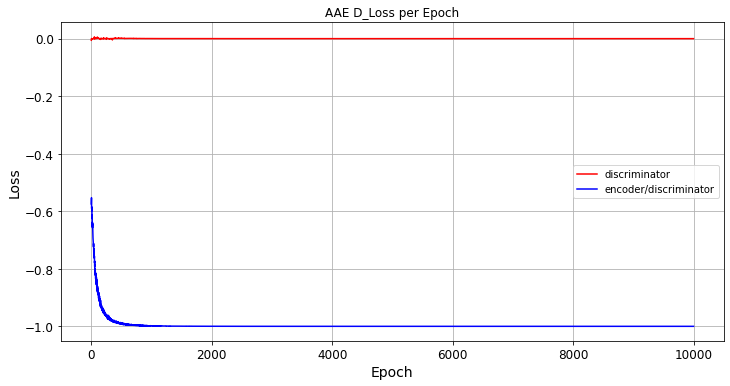

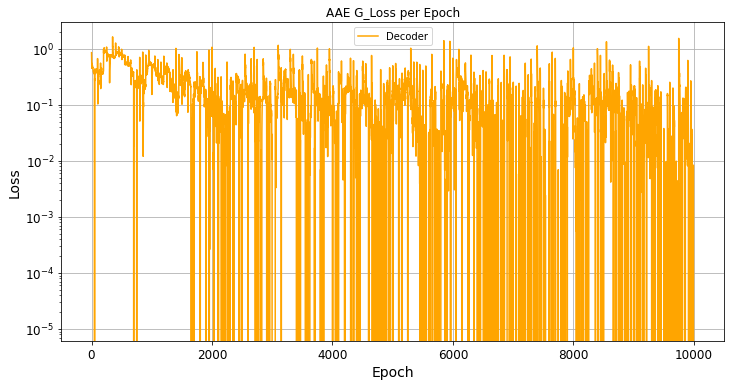

In [11]:
print('D_Loss: ')
fig, ax = plt.subplots(figsize=[10,5])
ax.plot(aae.c1_hist, c='red')
ax.plot(aae.endis_hist, c='blue')
ax.legend(['discriminator','encoder/discriminator'])
ax.grid()

plt.tight_layout()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("AAE D_Loss per Epoch")
plt.savefig('AAE/Losses/AAE_dloss'+'.png')



print('G_Loss: ')
fig, ax = plt.subplots(1,1, figsize=[10,5])
ax.plot(aae.decoder_hist, c='orange')
#ax.plot(aae.g_hist[1], c='green')

ax.legend(['Decoder'])
ax.grid()

plt.tight_layout()
plt.yscale('log')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("AAE G_Loss per Epoch")
plt.savefig('AAE/Losses/AAE_gloss'+'.png')



### Applying the prediction function

input_test : (900, 2)


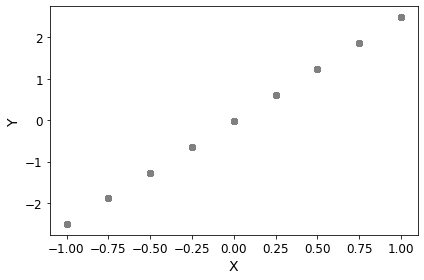

In [12]:
# define these for desired prediction
x_input = [-4,-3,-2,-1,0,1,2,3,4]
n_points = 900
y_min = -1
y_max = 1

# produces an input of fixed x coordinates with random y values
predict1 = np.full((n_points//9, n_features), x_input[0])
predict2 = np.full((n_points//9, n_features), x_input[1])
predict3 = np.full((n_points//9, n_features), x_input[2])
predict4 = np.full((n_points//9, n_features), x_input[3])
predict5 = np.full((n_points//9, n_features), x_input[4])
predict6 = np.full((n_points//9, n_features), x_input[5])
predict7 = np.full((n_points//9, n_features), x_input[6])
predict8 = np.full((n_points//9, n_features), x_input[7])
predict9 = np.full((n_points//9, n_features), x_input[8])

predictthis = np.concatenate((predict1, predict2, predict3, predict4, predict5, predict6, predict7, predict8, predict9))
predictthis_scaled = scaler.transform(predictthis)
input_test = predictthis_scaled.reshape(n_points, n_features).astype('float32')


print("input_test :",input_test.shape)
plt.scatter(input_test[:,0],input_test[:,1] ,c='grey')
plt.ylabel('Y')
plt.xlabel('X')
plt.tight_layout()
    

In [13]:
X_generated = decoder(encoder.predict(input_test))
print("X_generated :",X_generated.shape)

X_generated : (900, 2)


Generated Data: (900, 2)


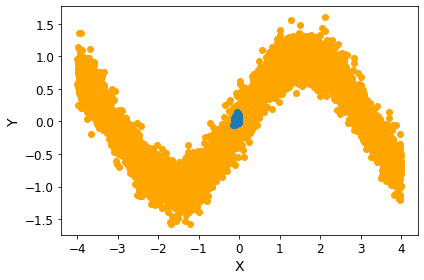

In [14]:
if scenario in ("3d", "helix"):
    print("latent_space=",latent_space)
    print("Epochs=",epochs)
    print("BATCH_SIZE=",BATCH_SIZE)
    print("use_bias=",use_bias)
    
    ax = plt.subplot(projection='3d')
    ax.scatter(X_generated[:,0], X_generated[:,1], X_generated[:,2], label='Generated Data')


    ax.set_zlabel('Z')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')

    plt.legend(loc='best')
    plt.tight_layout()
    
    print("X-Y 2D slices:")
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    plt.ylim(-1.5,1.5)
    plt.xlim(-1.5,1.5)
    axes[0].scatter(X_train[:,0],X_train[:,1])
    axes[0].scatter(X_generated[:,0],X_generated[:,1])
    axes[0].set_xlabel("X")
    axes[0].set_ylabel("Y")
    
    plt.ylim(-1.5,1.5)
    plt.xlim(-2,22)
    axes[1].scatter(X_train[:,1],y_train)
    axes[1].scatter(X_generated[:,1],X_generated[:,2])
    axes[1].set_xlabel("Y")
    axes[1].set_ylabel("Z")
    
    plt.xlim(-1.5,1.5)
    plt.ylim(-2,22)
    axes[2].scatter(X_train[:,0],y_train)
    axes[2].scatter(X_generated[:,0],X_generated[:,2])
    axes[2].set_xlabel("X")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    
    ac=np.where(np.logical_and(X_train[:,0]>=-0.8-0.05,X_train[:,0]<=-0.8+0.05),X_train[:,1],None)
    ad=np.where(np.logical_and(X_generated[:,0]>=-0.8-0.05,X_generated[:,0]<=-0.8+0.05),X_generated[:,1],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,X_generated[:,2])
    axes[0].set_xlabel("Y(X=-0.8)")
    axes[0].set_ylabel("Y")
    
    ae=np.where(np.logical_and(X_train[:,0]>=0.0-0.05,X_train[:,0]<=0.0+0.05),X_train[:,1],None)
    af=np.where(np.logical_and(X_generated[:,0]>=0.0-0.05,X_generated[:,0]<=0.0+0.05),X_generated[:,1],None)
    axes[1].scatter(ae,y_train)
    axes[1].scatter(af,X_generated[:,2])
    axes[1].set_xlabel("Y(X=0.0)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,0]>=0.8-0.05,X_train[:,0]<=0.8+0.05),X_train[:,1],None)
    ah=np.where(np.logical_and(X_generated[:,0]>=0.8-0.05,X_generated[:,0]<=0.8+0.05),X_generated[:,1],None)
    axes[2].scatter(ag,y_train)
    axes[2].scatter(ah,X_generated[:,2])
    axes[2].set_xlabel("Y(X=0.8)")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    
    
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    ac=np.where(np.logical_and(X_train[:,1]>=0.2-0.05,X_train[:,1]<=0.2+0.05),X_train[:,0],None)
    ad=np.where(np.logical_and(X_generated[:,1]>=0.2-0.05,X_generated[:,1]<=0.2+0.05),X_generated[:,0],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,X_generated[:,2])
    axes[0].set_xlabel("X(Y=0.2)")
    axes[0].set_ylabel("Z")
    
    ae=np.where(np.logical_and(X_train[:,1]>=0.5-0.05,X_train[:,1]<=0.5+0.05),X_train[:,0],None)
    af=np.where(np.logical_and(X_generated[:,1]>=0.5-0.05,X_generated[:,1]<=0.5+0.05),X_generated[:,0],None)
    axes[1].scatter(ae,y_train)
    axes[1].scatter(af,X_generated[:,2])
    axes[1].set_xlabel("X(Y=0.5)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,1]>=0.8-0.05,X_train[:,1]<=0.8+0.05),X_train[:,0],None)
    ah=np.where(np.logical_and(X_generated[:,1]>=0.8-0.05,X_generated[:,1]<=0.8+0.05),X_generated[:,0],None)
    axes[2].scatter(ag,y_train)
    axes[2].scatter(ah,X_generated[:,2])
    axes[2].set_xlabel("X(Y=0.8)")
    axes[2].set_ylabel("Z")
    
    
    plt.tight_layout()
    
    
else:
    print("Generated Data:",X_generated.shape)
    plt.scatter(X_train, y_train,c='orange') 
    plt.scatter(X_generated[:,0],X_generated[:,1])
    #plt.scatter(predicted_values4[:,0],predicted_values4[:,1],c='grey')#X_trained_scaled
    #plt.scatter(predicted_values2[:,0],predicted_values2[:,1])
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()
    